# Adam Wilczyński

Contingency described in the exercise addresses (for example) the following two issues:

1. It motivates emoloyees and encourages to greater effort. Usually, the result of the investment is associated with the effort of enterpreneurs. Therefore, when a salary of workers is conditional on the success of the company, they have additional incentive to work hard. <br>
If this was not true and success didn't depend on effort, Venture Capitalist could keep all of the shares as he is risk neutral and workers can be risk averse.

2. Using stock options Venture Capitalist can reduce labor costs as only part of the salary is paid in cash, the other part is in options. Usually, VC has limited financial resources. If the start-up consumed founds up to some stricktly defined treshhold and still doesn't obtain profit, VC must drop the project and accept its failure. Reduction of labor costs allows VC to run startup much longer which could increase the probability of success. I would like to present this issue using the following model.

# Model

An innovative start-up  is close to discover a new nanomaterial. 

Researchers estimate that the probability of a breakthrough is 'p' in each subsequent month of research. <br>
In case of the breakthrough the company can be instantly aquired at price 'R'. <br>
Labor cost accounts for  'w'  monthly. Other costs are negligible. <br>
Venture Capitalist has only  'A' available funds. <br>
When funds run out, start-up terminates.

Data used in the example: <br>
p = 5% <br>
R = \$1000M <br>
w = \$2M <br>
A = \$10M <br>

<b>1)</b><br>
This means that in normal case, when VC pays all salary in cach, start-up may operate only 5 months. Probability of the discovery is: $ \sum^5_{t=1} 0.05(1-0.05)^{t-1} \approx 0.23  $ <br>
Expected labor cost (salary of researchers):
$ 2 \cdot 0.05 + 4 \cdot 0.05 \cdot 0.95 + 6 \cdot 0.05 \cdot 0.95^{2} ... 10 \cdot (1-\sum^5_{t=1} 0.05(1-0.05)^{t-1}) \approx 9.05 $ <br>
Therefore, expected profit for VC is:
$ 0.23 \cdot 1000 - 9.05 = 220.95 $

<b>2)</b> <br>
Now assume that VC may negotiate with employees that they will get half of the market salary but in case of success they will obtain a free share (Let's say 10%).

Now, when labor costs are only \$1M monthly, company may operate max 10 months. New probability of achieving discovery is: 
$ \sum^{10}_{t=1} 0.05(1-0.05)^{t-1} \approx 0.4  $ <br>
Expected labor cost:
$ 1 \cdot 0.05 + 2 \cdot 0.05 \cdot 0.95 + 3 \cdot 0.05 \cdot 0.95^{2} ... 10 \cdot (1-\sum^10_{t=1} 0.05(1-0.05)^{t-1}) \approx 8.03 $ <br>
Therefore, expected profit for VC is:
$ 0.4 \cdot (1-0.1) \cdot 1000 - 8.03 = 351.97 $ which is higher than $220.95$

Moreover, expected payoff of reserchers is: $ 0.1 \cdot 0.4 \cdot 1000 + \cdot 8.03 = 48.03 $ which is much higher than $9.05$ in the previous case.

Therefore, I have proven that contingent contract may be very benefitial for both - VC and employees

### Probability of discovery as a function of time

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import random

P_tot = []
p = 0.05
P_tot.append(0)
for t in range(1, 100):
    P_in_t = p*(1-p)**(t-1)
    P_tot.append(P_tot[-1]+P_in_t)
    
print("Probability of success in 5 moplt.rcParams["figure.figsize"] = (10,5)nths: ", round(P_tot[5],3))
print("Probability of success in 10 months: ", round(P_tot[10],3))

Probability of success in 5 months:  0.226
Probability of success in 10 months:  0.401


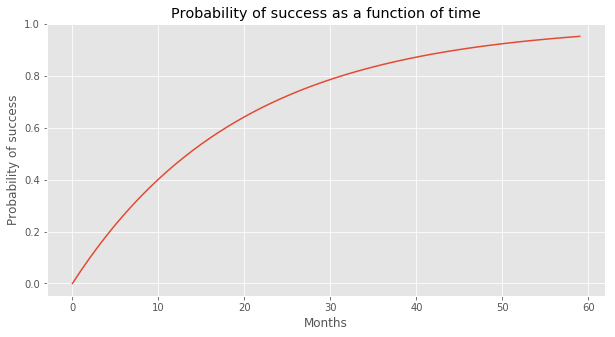

In [38]:
def plot_prob():
    plt.plot(range(60), P_tot[0:60])
    plt.ylabel('Probability of success')
    plt.title('Probability of success as a function of time')
    plt.xlabel('Months')    
    plt.rcParams["figure.figsize"] = (10,5)
    
plot_prob()

## Solution of the model
Let's assume that emoloyees are also risk neutral and they have no bargaining power. The only condition is that their expected payoff must be at least \$2M monthly. What is optimal lifetime of the startup, assuming that VC has still only \$10M in cash but can compensate the salary by stock options?
Assume for simplicity that if contract is signed for given number of months, VC cannot terminate startup before the end of contract even if the discovery is made much earlier.

In [93]:
#define probability function:
def p(t):
    P_tot = []
    p1 = 0.05
    P_tot.append(0)
    for i in range(1, t+1):
        P_in_t = p1*(1-p1)**(i-1)
        P_tot.append(P_tot[-1]+P_in_t)
    return(P_tot[-1])

#define (expected) labor cost as a function of time
def LC(t):
    return(t*2)

def expected_profit(t):
    return(p(t)*1000-LC(t))

#define optimal share
def s(t):
    if LC(t)<=10:
        return(0)
    else:
        return((LC(t)-10)/expected_profit(t))

#define profit of VC
def profit_VC(t):
    return((1-s(t))*expected_profit(t))

In [107]:
VC = [0]*100
S = [0]*100
for t in range(100):
    VC[t] = profit_VC(t)
    S[t] = s(t)

In [137]:
def plot_VC():
    plt.plot(range(100), VC)
    plt.ylabel('Expected profit of VC')
    plt.xlabel('Lifetime of startup')
    plt.title('Expected profit of VC as a function of start-ups liftime')
    plt.rcParams["figure.figsize"] = (10,5)
    
def plot_Share():
    plt.plot(range(100), S)
    plt.ylabel('Share of stock as a stock option')
    plt.title('Share that is necessary to be offered as an option stock to compensate labor cost')
    plt.xlabel('Lifetime of startup')
    plt.rcParams["figure.figsize"] = (10,5)

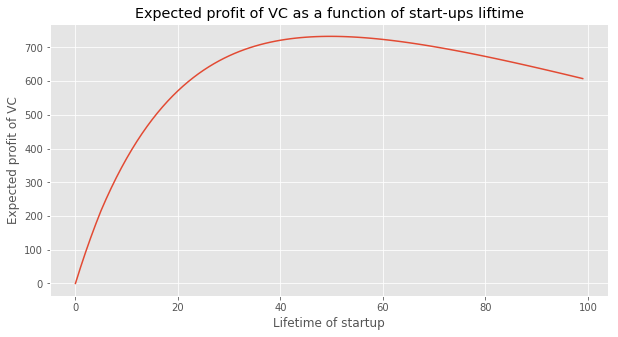

In [138]:
plot_VC()

In [136]:
print('maximal VCs profit: ', max(VC))
print('optimal lifetime: ', np.argmax(VC))
print('Share of stock option', round(S[np.argmax(VC)], 3))

maximal VCs profit:  733.055024723286
optimal lifetime:  50
Share of stock option 0.109


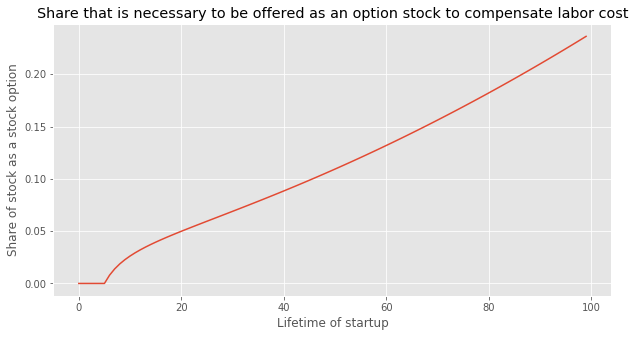

In [126]:
plot_Share()

In [139]:
S[50]*expected_profit(50)

90.0

Apparently, the VC should offer the contract for 50 months. Researchers will get \$0.2M monthly in cash and stock option for 10.9%. This means that reserchers will obtain \$10M in cash and stock option with expected payoff \$90M. Expected profit of VC will be \$733.06M. 